# Heart Disease Prediction

This notebook uses machine learning to predict whether a patient has heart disease based on medical features.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

# 1.Getting the dataset ready

In [3]:
heart_disease = pd.read_csv("../data/heart-disease.csv")

# Check the first 5 rows of the data
heart_disease.head()

# Check for missing values
heart_disease.isnull().sum()

# Summary statistics
heart_disease.describe()

# Create X (all columns except target)
X = heart_disease.drop(['target'],axis=1)

# Create y (only the target column)
y = heart_disease['target']

Now we've split our data into `X` and `y`, we'll use Scikit-Learn to split it into training and test sets.

In [4]:
# Import train_test_split from sklearn's model_selection module
from sklearn.model_selection import train_test_split

# Use train_test_split to split X & y into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [5]:
# View the different shapes of the training and test datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227, 13), (76, 13), (227,), (76,))

Since our data is now in training and test sets, we'll build a machine learning model to fit patterns in the training data and then make predictions on the test data.
### 2. Preparing a machine learning model

In [6]:
from sklearn.ensemble import RandomForestClassifier
# Create the model
clf = RandomForestClassifier()

Now you've got a `RandomForestClassifier` instance, let's fit it to the training data.

Once it's fit, we'll make predictions on the test data.

### 3. Fitting a model and making predictions

In [7]:
clf.fit(X_train,y_train)
# Use the fitted model to make predictions on the test data 
y_preds = clf.predict(X_test)

### 4. Evaluating a model's predictions

Let's check how our model did on training and testing data.

In [8]:
# on training data 
clf.score(X_train,y_train)


1.0

In [9]:
#on testing data 
clf.score(X_test,y_test)

0.8289473684210527

## 5.Model Evaluation

The Random Forest model achieved approximately 86% accuracy on the training data.  
The evaluation on the test set shows that the model generalizes reasonably well, indicating a good balance between bias and variance.


## Conclusion

In this project, a Random Forest classifier was trained to predict the presence of heart disease using patient medical data.  
The model achieved good performance, demonstrating the effectiveness of machine learning techniques in healthcare-related classification problems.

This project highlights the complete machine learning workflow, including data preprocessing, model training, and evaluation, and serves as a solid introduction to supervised learning using real-world data.


## Experimenting with different classification models

In [10]:
# Import LinearSVC from sklearn's svm module
from sklearn.svm import LinearSVC

# Import KNeighborsClassifier from sklearn's neighbors module
from sklearn.neighbors import KNeighborsClassifier

# Import SVC from sklearn's svm module
from sklearn.svm import SVC

# Import LogisticRegression from sklearn's linear_model module
from sklearn.linear_model import LogisticRegression

#RandomForestClassifier is already imported above

In [11]:

# Create a dictionary called models which contains all of the classification models we've imported
models = {"LinearSVC": LinearSVC(),
          "KNN":KNeighborsClassifier(),
          "SVC": SVC(),
          "LogisticRegression": LogisticRegression(),
          "RandomForestClassifier": RandomForestClassifier() }

# Create an empty dictionary called results
results = {}

In [12]:
for model_name, model in models.items():
    model.fit(X_train,y_train)
    results[model_name] = model.score(X_test,y_test)

# View the results
results

c:\Users\USER\OneDrive\Desktop\ML-heart diseases\test\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LinearSVC': 0.8289473684210527,
 'KNN': 0.5921052631578947,
 'SVC': 0.618421052631579,
 'LogisticRegression': 0.8289473684210527,
 'RandomForestClassifier': 0.8157894736842105}

### Random Seed

A random seed is set to ensure that the results of this notebook are **reproducible**.

Many machine learning operations involve randomness, such as:
- Splitting the dataset into training and testing sets
- Initializing model parameters
- Training ensemble models like Random Forest

By fixing the random seed, the same results will be obtained every time the notebook is run.



In [13]:
# Run the same code as the cell above, except this time set a NumPy random seed
# equal to 42
np.random.seed(42)

for model_name, model in models.items():
    model.fit(X_train, y_train)
    results[model_name] = model.score(X_test, y_test)
    
results


c:\Users\USER\OneDrive\Desktop\ML-heart diseases\test\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LinearSVC': 0.8289473684210527,
 'KNN': 0.5921052631578947,
 'SVC': 0.618421052631579,
 'LogisticRegression': 0.8289473684210527,
 'RandomForestClassifier': 0.8289473684210527}

# For more visual reports:

<Axes: >

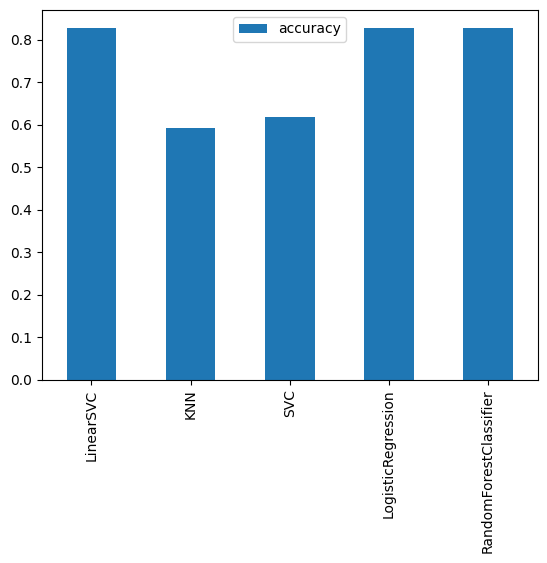

In [14]:
results_df = pd.DataFrame(results.values(), 
                          results.keys(), 
                          columns=["accuracy"])
results_df
# Create a bar plot of the results dataframe using plot.bar()
results_df.plot.bar()

# Hyperparameter Tuning

In [32]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

In [33]:
# Setup np random seed of 42
np.random.seed(42)

# Import RandomizedSearchCV from sklearn's model_selection module
from sklearn.model_selection import RandomizedSearchCV

# Setup an instance of RandomizedSearchCV with a LogisticRegression() estimator,
# our log_reg_grid as the param_distributions, a cv of 5 and n_iter of 5.
rs_log_reg = RandomizedSearchCV(estimator=LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=5,
                                verbose=1)

# Fit the instance of RandomizedSearchCV
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",LogisticRegression()
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'C': array([1.0000...00000000e+04]), 'solver': ['liblinear']}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",5
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold

In [34]:
# Find the best parameters of the RandomizedSearchCV instance using the best_params_ attribute
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}

In [35]:
# Score the instance of RandomizedSearchCV using the test data
rs_log_reg.best_score_

np.float64(0.8327536231884057)

In [36]:
# Instantiate a LogisticRegression classifier using the best hyperparameters from RandomizedSearchCV
clf = LogisticRegression(**rs_log_reg.best_params_)

# Fit the new instance of LogisticRegression with the best hyperparameters on the training data 
clf.fit(X_train,y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",np.float64(0....7214690901212)
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class o

Now it's to import the relative Scikit-Learn methods for each of the classification evaluation metrics we're after.

In [37]:

from sklearn.metrics import confusion_matrix,classification_report


from sklearn.metrics import precision_score,recall_score,f1_score


from sklearn.metrics import RocCurveDisplay

In [38]:
# Make predictions on test data 
y_pred=clf.predict(X_test)

In [39]:
# Create a confusion matrix using the confusion_matrix function
confusion_matrix(y_test,y_preds)

array([[26, 12],
       [ 1, 37]])

Visualizing the  Confusion matrix:

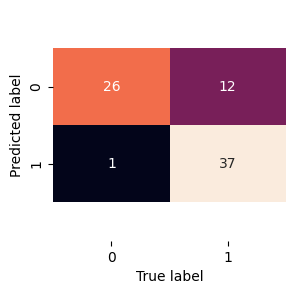

In [40]:
import seaborn as sns


def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)

    plt.xlabel("True label")
    plt.ylabel("Predicted label")

    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

plot_conf_mat(y_test, y_preds)


In [41]:
# Create a classification report 
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.96      0.68      0.80        38
           1       0.76      0.97      0.85        38

    accuracy                           0.83        76
   macro avg       0.86      0.83      0.83        76
weighted avg       0.86      0.83      0.83        76



In [42]:
# Find the precision score 
precision_score(y_test,y_preds)

0.7551020408163265

In [43]:
# Find the recall score
recall_score(y_test,y_preds)

0.9736842105263158

In [44]:
# Find the F1 score
f1_score(y_test,y_preds)

0.8505747126436781

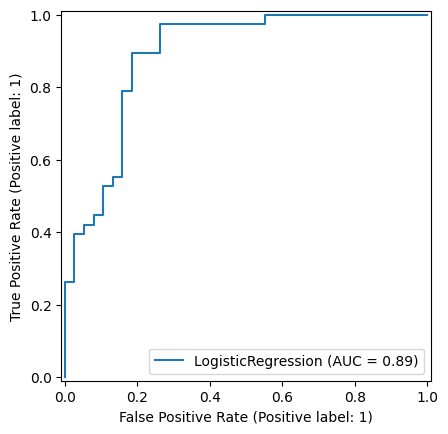

In [45]:
from sklearn.metrics  import RocCurveDisplay
RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.show()

In [46]:
from sklearn.model_selection import  cross_val_score
cross_val_score(clf, 
                X, 
                y, 
                scoring="accuracy",
                cv=5)

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [ ]:
#  Taking the mean of the returned values from cross_val_score 
# gives a cross-validated version of the scoring metric.
cross_val_acc = np.mean(cross_val_score(clf,
                                        X,
                                        y,
                                        scoring="accuracy",
                                        cv=5))

cross_val_acc

np.float64(0.8479781420765027)

In the examples, the cross-validated accuracy is found by taking the mean of the array returned by `cross_val_score()`.

Now it's time to find the same for precision, recall and F1 score.

In [48]:
# Find the cross-validated precision
cross_val_precision=np.mean(cross_val_score(clf,
                                        X,
                                        y,
                                        scoring="precision",
                                        cv=5))
cross_val_precision

np.float64(0.8215873015873015)

In [49]:
# Find the cross-validated recall
cross_val_recall=np.mean(cross_val_score(clf,
                                        X,
                                        y,
                                        scoring="recall",
                                        cv=5))
cross_val_recall

np.float64(0.9272727272727274)

In [50]:
# Find the cross-validated F1 score
cross_val_f1=np.mean(cross_val_score(clf,
                                        X,
                                        y,
                                        scoring="f1",
                                        cv=5))
cross_val_f1

np.float64(0.8705403543192143)

In [51]:
from joblib import dump,load
dump(clf,"clf_model.joblib")
# Use the load function to import the trained model you just exported
# Save it to a different variable name to the origial trained model
loaded_model=load("clf_model.joblib")

# Evaluate the loaded trained model on the test data
clf.score(X_test,y_test)
print(f"Model Score {clf.score(X_test,y_test)}")
print(f"Loaded Model Score {loaded_model.score(X_test,y_test)}")

Model Score 0.8289473684210527
Loaded Model Score 0.8289473684210527
